We consider the unperturbed network

$\dot{\Theta}_i = \omega + \frac{1}{N} \sum_{j=1}^N g(\Theta_i - \Theta_j)$,

where $g(\Phi) = -\sin(\Phi + \alpha) + r\sin(2\Phi)$.

The parameters are $N=5, \alpha=1.25, \omega=5, r=0.25$.

A stable orbit is defined by constant phase differences between, i.e. $\dot{\Theta_1}=\dot{\Theta_2}=...=\dot{\Theta_5}$.

Such a condition is satisfied for orbits $P_j^k$ in the set of permutations of $(0,0,0,\psi_j,\psi_j)$, where $k$ is an index identifying the permutation.

Plugging the requirement $\dot{\Theta_1}=\dot{\Theta_2}=...=\dot{\Theta_5}$ for any orbit $P_j^k$ into the differential equation for $\dot{\Theta_i}$ returns

$3g(0)+2g(-\psi_j) = 2g(0) + 3 g(\psi_j)$

and thus

$g(0) - 2\sin(1.25-\psi_j) + 3\sin(\psi_j +1.25)-1.25\sin(2\psi_j)$.

The $\psi_j \in (-2\pi, 2\pi)$ solving this are: $\{-5.096, -3.634, -0.695, 0, 1.187, 2.650, 5.588  \}$.

This is equivalent to phase differences $\psi_j \in \{ 0, 1.187, 2.649, 0.695  \}$:


# Pseudocode

phase difference = abs(phase difference)

if phase difference > pi:

    phase difference = 2*pi - phase difference

  0%|          | 277/100000 [00:00<00:36, 2760.75it/s]

Starting value of phi is
[-0.1204598  -0.08754001  0.13061225  1.46741678  1.48305311]


100%|██████████| 100000/100000 [00:36<00:00, 2735.23it/s]


Oscillators in first group:
[1 2]
Oscillators in second group:
[3 4 5]


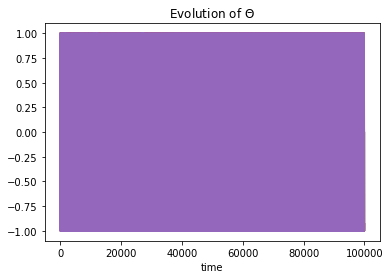

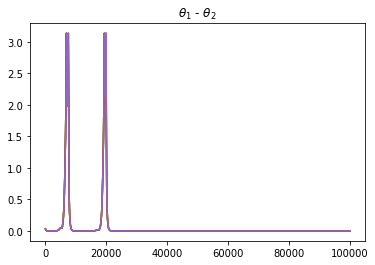

last value: 0.000000


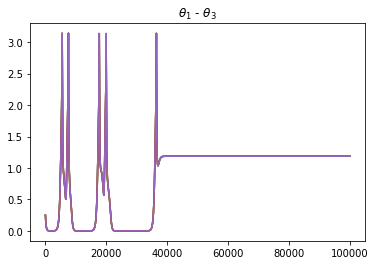

last value: 1.186826


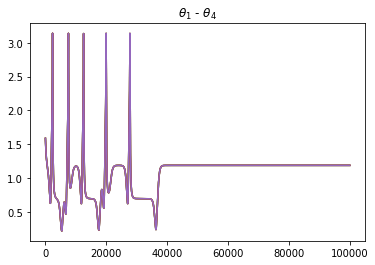

last value: 1.186826


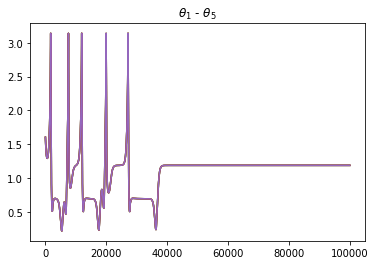

last value: 1.186826


Phi:
[4316.54393679 4316.54393679 4321.64029644 4321.64029644 4321.64029644]


Phase Differences after last iteraiton:
[[0.         0.         1.18682566 1.18682566 1.18682566]
 [0.         0.         1.18682566 1.18682566 1.18682566]
 [1.18682566 1.18682566 0.         0.         0.        ]
 [1.18682566 1.18682566 0.         0.         0.        ]
 [1.18682566 1.18682566 0.         0.         0.        ]]




Oscillators in first group:
[1 2]
Oscillators in second group:
[3 4 5]
Done


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import *

# Ashwin & Borresen: Discrete computation using a perturbed heteroclinic network, PLA 2005#

def g(phi):
    alpha = 1.25
    r = 0.25
    return -np.sin(phi + alpha) + r*np.sin(2*phi)

def phase_diffs(phi):
    phase_differences = np.zeros((5,5))
    for row in range(5):
        for col in range(5):
            phase_differences[row,col] = abs(phi[row]%(2*np.pi) - phi[col]%(2*np.pi))
            
            if phase_differences[row,col] > np.pi:
                phase_differences[row,col] = 2*np.pi - phase_differences[row,col]
            
            phase_differences[row,col] = np.round(phase_differences[row,col],decimals=8)
            
    return phase_differences

N = 5
omega = 5
timesteps = 100_000
dt = 0.01
    
# Define initial vector phi
# ================================== #
# Does not reach stationary state
#phi = np.zeros(N)+[0,3,0.5,1.339,2]
# ================================== #
# To reach stationary state:
# Ashwin: "For the parameter values used in this Letter the only attractor for the unperturbed system consists of twenty orbits with symmetry S2xS3"
# phi = np.random.uniform(low=-2*np.pi,high=2*np.pi,size=5)
#phi = np.concatenate((np.random.uniform(low=-2*np.pi,high=2*np.pi)*\
#np.ones(3),np.random.uniform(low=-2*np.pi,high=2*np.pi)*np.ones(2)))# phi = np.zeros(N)+[0,0,0.01,0.799+0.01,0.799-0.01]
# phi = np.array([1.5,0.2,1,1.6,2])
phi = np.array([0,0,0,1.339,1.339]) + np.random.normal(loc=0,scale=0.1,size=5)
# ================================== #

phi_hist = np.zeros((N,timesteps))
phi_hist[:,0] = phi        
            
phase_diff_hist = np.zeros((timesteps,N,N))
phase_diff_hist[0,:,:] = phase_diffs(phi).reshape(1,5,5)

print('Starting value of phi is')
print(phi)

for t in tqdm(range(timesteps)):
    
    summation = 0*phi
    for angle in phi:
        summation += g(phi - angle)
    
    dphidt = omega + 1/N * summation
    
    phi = phi + dphidt*dt
    
    phi_hist[:, t] = phi
    phase_diff_hist[t,:,:] =  phase_diffs(phi).reshape(1,5,5)    

first_group=np.where(phase_diff_hist[-1,0,:] == 0)
second_group=np.where(phase_diff_hist[-1,0,:] != 0)
print('Oscillators in first group:')
print(first_group[0]+1)
print('Oscillators in second group:')
print(second_group[0]+1)
    
%matplotlib inline
plt.figure()

for i in range(N):
    plt.plot(np.sin(phi_hist[i,:]))

#plt.yscale('log')
plt.title(r'Evolution of $\Theta$')
plt.xlabel('time')
plt.show()

plt.figure()
for i in range(N):
    plt.plot(phase_diff_hist[:,0,1])
    
plt.title(r'$\theta_1$ - $\theta_2$')
plt.show()
print('last value: %f'%phase_diff_hist[-1,0,1])
        
plt.figure()
for i in range(N):
    plt.plot(phase_diff_hist[:,0,2])
    
plt.title(r'$\theta_1$ - $\theta_3$')
plt.show()
print('last value: %f'%phase_diff_hist[-1,0,2])
    
plt.figure()
for i in range(N):
    plt.plot(phase_diff_hist[:,0,3])
    
plt.title(r'$\theta_1$ - $\theta_4$')
plt.show()
print('last value: %f'%phase_diff_hist[-1,0,3])

plt.figure()
for i in range(N):
    plt.plot(phase_diff_hist[:,0,4])
    
plt.title(r'$\theta_1$ - $\theta_5$')
plt.show()

print('last value: %f'%phase_diff_hist[-1,0,4])
print('\n')
print('Phi:')
print(phi)
print('\n')
print('Phase Differences after last iteraiton:')
print(phase_diff_hist[-1,:,:])
print('\n')
print('\n')
print(r'Oscillators in first group:')
print(first_group[0]+1)
print('Oscillators in second group:')
print(second_group[0]+1)
print('Done')

<IPython.core.display.Javascript object>


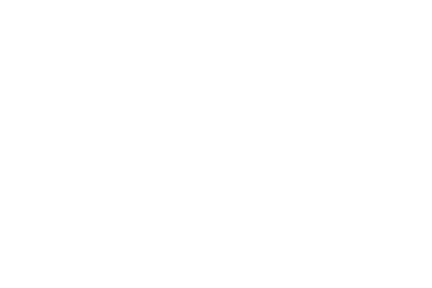

<IPython.core.display.Javascript object>


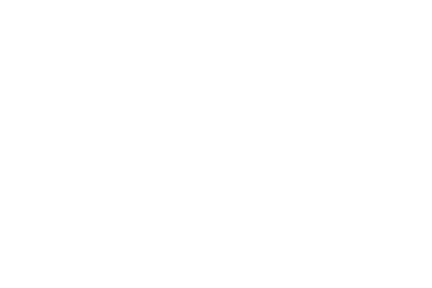

In [50]:
from importlib import reload
reload(plt)

%matplotlib notebook
%matplotlib notebook

plt.figure()

for i in range(N):
    plt.plot(np.sin(phi_hist[i,:]))

#plt.yscale('log')
plt.title(r'Evolution of sin($\Theta$)')
plt.xlabel('timestep')
plt.show()

['In',
 'N',
 'Out',
 'TMonitor',
 'TqdmDeprecationWarning',
 'TqdmExperimentalWarning',
 'TqdmKeyError',
 'TqdmMonitorWarning',
 'TqdmSynchronisationWarning',
 'TqdmTypeError',
 'TqdmWarning',
 '_',
 '_14',
 '_17',
 '_18',
 '_20',
 '_21',
 '_22',
 '_23',
 '_24',
 '_25',
 '_26',
 '_27',
 '_28',
 '_29',
 '_30',
 '_31',
 '_32',
 '_33',
 '_34',
 '_35',
 '_40',
 '_41',
 '_42',
 '_43',
 '_44',
 '_45',
 '_47',
 '_48',
 '_5',
 '_52',
 '_53',
 '_54',
 '_6',
 '_62',
 '_63',
 '_64',
 '_7',
 '_9',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '__version__',
 '_dh',
 '_i',
 '_i1',
 '_i10',
 '_i11',
 '_i12',
 '_i13',
 '_i14',
 '_i15',
 '_i16',
 '_i17',
 '_i18',
 '_i19',
 '_i2',
 '_i20',
 '_i21',
 '_i22',
 '_i23',
 '_i24',
 '_i25',
 '_i26',
 '_i27',
 '_i28',
 '_i29',
 '_i3',
 '_i30',
 '_i31',
 '_i32',
 '_i33',
 '_i34',
 '_i35',
 '_i36',
 '_i37',
 '_i38',
 '_i39',
 '_i4',
 '_i40',
 '_i41',
 '_i42',
 '_i43',
 '_i44',
 '_i45',
 '_i

5

In [45]:
np.ceil(phase_diff_hist[-1,0,:])

array([0., 7., 7., 6., 6.])

In [38]:
print(phase_diff_hist[-1,0,:]-2*np.pi)

[-6.28318531e+00 -8.71693828e-11 -3.04993364e-10 -1.18682570e+00
 -1.18682570e+00]


  8%|▊         | 398/4999 [00:00<00:01, 3979.23it/s]

n=0


  8%|▊         | 402/4999 [00:00<00:01, 4011.65it/s]

n=1


 15%|█▍        | 743/4999 [00:00<00:01, 3704.11it/s]

n=2


 16%|█▌        | 780/4999 [00:00<00:01, 3927.87it/s]

n=3


  8%|▊         | 402/4999 [00:00<00:01, 4007.07it/s]

n=4


100%|██████████| 4999/4999 [00:01<00:00, 3893.70it/s]


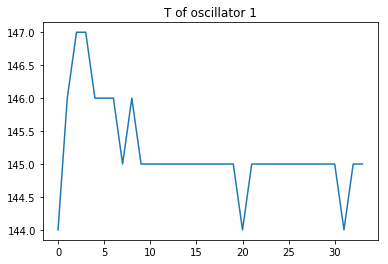

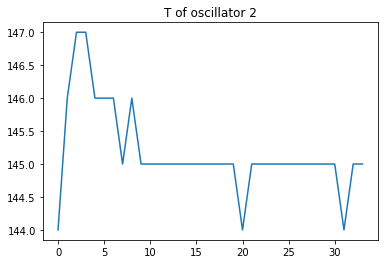

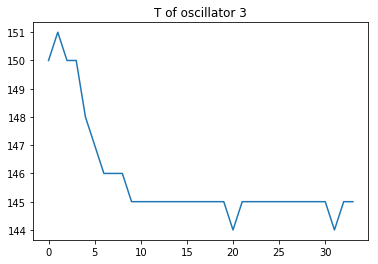

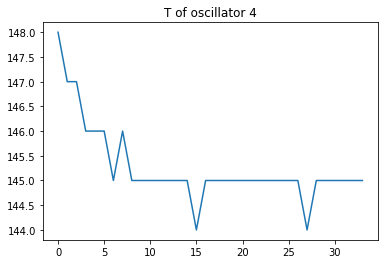

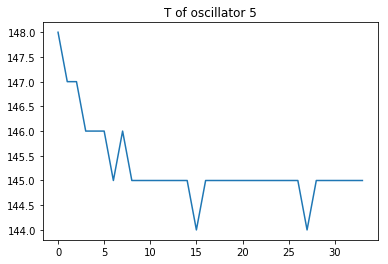

[35,
 179,
 325,
 472,
 619,
 765,
 911,
 1057,
 1202,
 1348,
 1493,
 1638,
 1783,
 1928,
 2073,
 2218,
 2363,
 2508,
 2653,
 2798,
 2943,
 3087,
 3232,
 3377,
 3522,
 3667,
 3812,
 3957,
 4102,
 4247,
 4392,
 4537,
 4681,
 4826,
 4971]

In [65]:
maxima = [[],[],[],[],[]]
for n in range(N):
    print("n=%d"%n)
    for idx in tqdm(range(1,np.sin(phi_hist[n,:]).shape[0]-1)):
        if (np.sin(phi_hist[n,:])[idx] >= np.sin(phi_hist[n,:])[idx-1]) and (np.sin(phi_hist[n,:])[idx] > np.sin(phi_hist[n,:])[idx+1]):
            #print('Max at %d'%idx)
            maxima[n].append(idx)
    
%matplotlib inline
            
for n in range(N):
    periods = np.diff(np.array(maxima[n]))
    plt.figure()
    plt.plot(periods)
    plt.title('T of oscillator %d'%(n+1))
    plt.show()

<IPython.core.display.Javascript object>


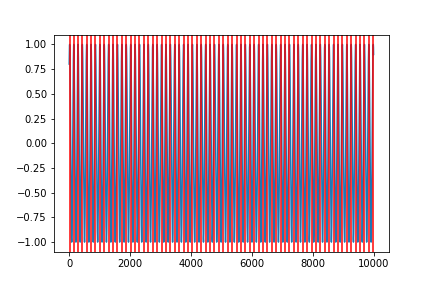

<IPython.core.display.Javascript object>


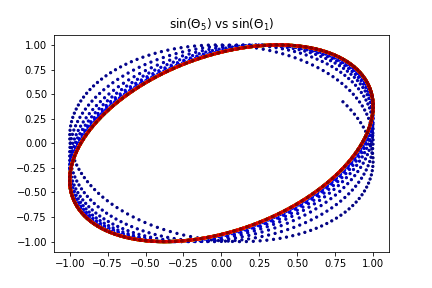

<IPython.core.display.Javascript object>


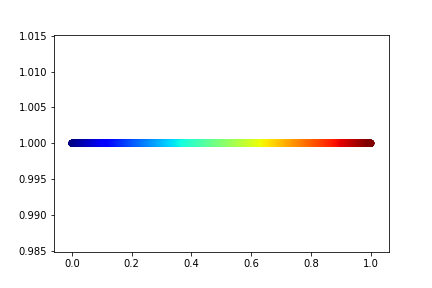

In [43]:
%matplotlib notebook
plt.figure()
plt.plot(test)
for line in maxima[0]:
    plt.axvline(x=line,color='r')
plt.show()

plt.figure()
t = np.linspace(0,1,phi_hist.shape[1])
plt.scatter(np.sin(phi_hist[0,:]),np.sin(phi_hist[4,:]),c=t,s=5, cmap ='jet')
plt.title(r'sin($\Theta_5$) vs sin($\Theta_1$)')
plt.show()

plt.figure()
plt.scatter(t,t*0+1,c=t,cmap='jet')
plt.show()

In [66]:
maxima[0]

[35,
 179,
 325,
 472,
 619,
 765,
 911,
 1057,
 1202,
 1348,
 1493,
 1638,
 1783,
 1928,
 2073,
 2218,
 2363,
 2508,
 2653,
 2798,
 2943,
 3087,
 3232,
 3377,
 3522,
 3667,
 3812,
 3957,
 4102,
 4247,
 4392,
 4537,
 4681,
 4826,
 4971]

In [67]:
maxima[1]

[35,
 179,
 325,
 472,
 619,
 765,
 911,
 1057,
 1202,
 1348,
 1493,
 1638,
 1783,
 1928,
 2073,
 2218,
 2363,
 2508,
 2653,
 2798,
 2943,
 3087,
 3232,
 3377,
 3522,
 3667,
 3812,
 3957,
 4102,
 4247,
 4392,
 4537,
 4681,
 4826,
 4971]

In [68]:
maxima[2]

[14,
 164,
 315,
 465,
 615,
 763,
 910,
 1056,
 1202,
 1348,
 1493,
 1638,
 1783,
 1928,
 2073,
 2218,
 2363,
 2508,
 2653,
 2798,
 2943,
 3087,
 3232,
 3377,
 3522,
 3667,
 3812,
 3957,
 4102,
 4247,
 4392,
 4537,
 4681,
 4826,
 4971]

In [69]:
maxima[3]

[5,
 153,
 300,
 447,
 593,
 739,
 885,
 1030,
 1176,
 1321,
 1466,
 1611,
 1756,
 1901,
 2046,
 2191,
 2335,
 2480,
 2625,
 2770,
 2915,
 3060,
 3205,
 3350,
 3495,
 3640,
 3785,
 3930,
 4074,
 4219,
 4364,
 4509,
 4654,
 4799,
 4944]

In [70]:
maxima[4]

[5,
 153,
 300,
 447,
 593,
 739,
 885,
 1030,
 1176,
 1321,
 1466,
 1611,
 1756,
 1901,
 2046,
 2191,
 2335,
 2480,
 2625,
 2770,
 2915,
 3060,
 3205,
 3350,
 3495,
 3640,
 3785,
 3930,
 4074,
 4219,
 4364,
 4509,
 4654,
 4799,
 4944]